# Matrix Multiplication Report By Musawenkosi Gumpu (2326254)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import numpy as np

## Constant Declarations and Function Definitions

In [2]:
CLASSIC = 'CLASSIC'
RECURSIVE = 'RECURSIVE'
STRASSEN = 'STRASSEN'
SIZE = 'SIZE'

data = pd.read_csv('results.csv')

In [3]:
def plot_individual(results_df, type):
    input_size = results_df[SIZE]
    run_times = results_df[type]

    plt.figure(figsize=(10, 6))

    plt.plot(input_size, run_times, marker='o')

    plt.title(f'Individual run time of {type} algorithm')
    plt.xlabel('Matrix Size')
    plt.ylabel('Execution Time, in microseconds')
    plt.grid(True)
    plt.xticks(input_size)

    plt.show()

def plot_results(results_df, b_log_scale):
    input_size = results_df[SIZE]
    classic_times = results_df[CLASSIC]
    recursive_times = results_df[RECURSIVE]
    strassen_times = results_df[STRASSEN]

    plt.figure(figsize=(10, 6))

    plt.plot(input_size, classic_times, marker='o', label='Classic')
    plt.plot(input_size, recursive_times, marker='o', label='Recursive')
    plt.plot(input_size, strassen_times, marker='o', label='Strassen')

    plt.title('Matrix Multiplication Comparisons')
    plt.xlabel('Matrix Size')
    plt.ylabel('Execution Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(input_size)

    if (b_log_scale):
        plt.yscale("log")

    plt.show()

def draw_table(results_df):
    print('The following runtimes were measured in microseconds, 1 second * 10^-6\n')

    print(results_df)

# Experimental Matrix Multiplication Analysis

The setup in this experiment allowed for an evaluation of diverse matrix types and dimensions, allowing for a wide variety of matrix multiplication inputs to be evaluated across the following algorithms : classical matrix multiplication, recursive divide and conquer, and Strassen's algorithm.

## Matrix Dimensions & Increments
The experimentation involved a range of matrix dimensions spanning from $4 \times 4 (2^2)$ to $516 \times 516 (\approx 2^{9.011})$ in increments of $32 (2^5)$. This range spanned 16 different matrix sizes, enabling a detailed assessment of algorithm performance across various dimensions.

## Runtime Measurement:
To ensure accurate results, each matrix calculation runtime was averaged over 2 iterations. This approach provided a reliable assessment of algorithm efficiency by minimizing the impact of transient factors. The runtime was measured in microseconds ($1 \times 10^{-6}$ seconds), this offered a precise measurement, especially in the case of classic multiplication for small input sizes.

## Programming Language and Constraints:
The algorithms were implemented in C++, well known for its performance and efficiency. It's worth noting that due to the substantial runtimes of recursive algorithms, particularly Strassen's algorithm, there was a limitation in testing larger input sizes. A potential avenue for improvement could have involved discovering and implementing optimizations within the algorithms.


## Matrix Types & Ranges

### Random Matrices:
These matrices were populated by numbers that follow no particular pattern. This occurred in the case that the input size was of a power of 2, as no padding would be necessary, in addition to there only being non-zero values.

### Sparse Matrices:
These are matrices consisting mostly of zero values. This happens in the case when padding is applied and matrices that are closer to a smaller power of 2 than the next power of 2 - from its current size.

### Dense Matrices:
These are matrices consisting mostly of non-zero values. In the case of padding on matrices that are closer to a larger power of 2 than the preceding one.



# Table Illustration

In [4]:
draw_table(data)

The following runtimes were measured in microseconds, 1 second * 10^-6

    SIZE  CLASSIC  RECURSIVE     STRASSEN
0      4        2        222          534
1     36      425     238145      2849436
2     68     2848    1916448     34243185
3    100     9078    1915730     34232280
4    132    20929   15275914    411628119
5    164    40095   15283164    411586879
6    196    69408   15274821    411566577
7    228   110806   15269759    411562891
8    260   165347  122354934   4935434277
9    292   237093  122420089   4936187193
10   324   329046  122386537   4936315832
11   356   446394  122381368   4935745535
12   388   585339  122496830   4936020612
13   420   753944  122472774   4936117530
14   452   948953  122374575   4937313454
15   484  1169439  122382199   4934842121
16   516  1451847  978440611  59186635756


## Algorithmic Insights and Overheads:
Through careful profiling, important insights were revealed. Recursive algorithms had significantly large runtimes due to the overhead caused by factors such as creating copies of partition matrices and the recursive function calls. These actions introduced additional space overhead from the stack frame which heavily impacted the overall performance, especially in the case of applying these algorithms on small input sizes

# Graph Illustration

## Individual Analysis

One can view in the individual plots of each algorithm's performance that they resemble a somewhat quadratic pattern that is ever-increasing.

An explanation for the periodically sudden jumps in the recursive and Strassen's algorithm, is that padding is applied to allow the input sizes to become a power of 2, which is necessary for the algorithm to function.
An interesting observation in the recursive algorithms is how the growth rate of their runtimes tend to progressively decrease within the range of sizes that share the same proceeding power of 2. This is significant as it appears that sparse matrices may possibly perform slower compared to denser matrices. This is justified by the redundancy involved in copying and calculating partitions of 0 matrices.

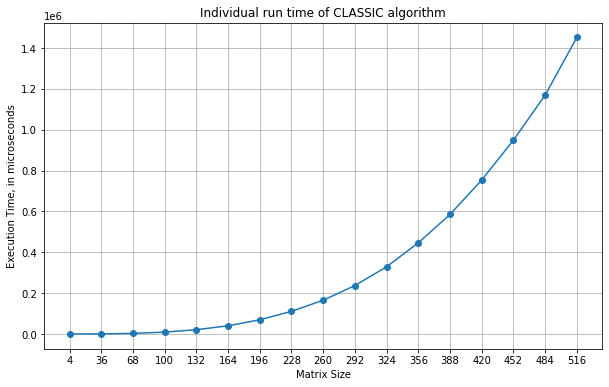

In [5]:
plot_individual(data, CLASSIC)

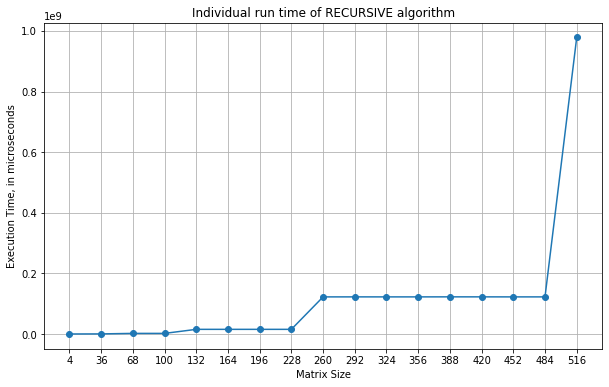

In [6]:
plot_individual(data, RECURSIVE)

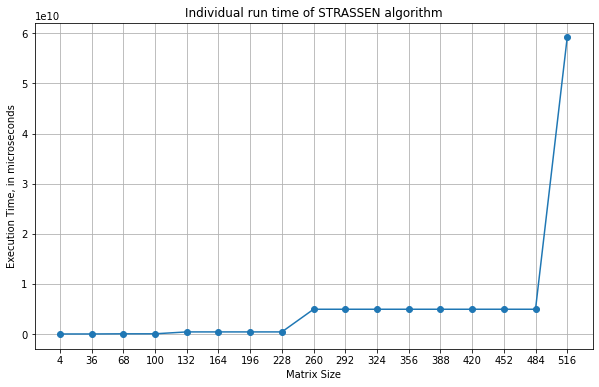

In [7]:
plot_individual(data, STRASSEN)

## Compared analysis
In direct comparison, Strassen's algorithm exhibits the poorest performance when compared with the recursive and classic matrix multiplication algorithms. While this is especially apparent for smaller input sizes, it's noteworthy that the advantages of opting for Strassen's algorithm become more noticable as the input sizes are considerably larger.
The log scale shows this in how the growth of the classic matrix multiplication's runtime will cause it to catch up to the recursive algorithm and Strassen's too.

As proven in the prescribed 'Introduction to Algorithms' textbook for this course, the calculated S and P partitions are equivalent to the divide and conquer partition calculations. This also justifies how the growth trends are similar, yet Strassen's algorithm is of a higher scale, due to the additional overhead caused by the instantiated and calculated S and P partitions which could be simplified to the simple A and B partition multiplications that the recursive algorithm performs.

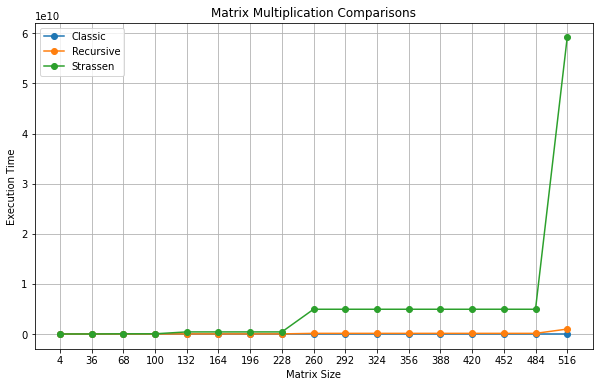

In [8]:
plot_results(data, False)

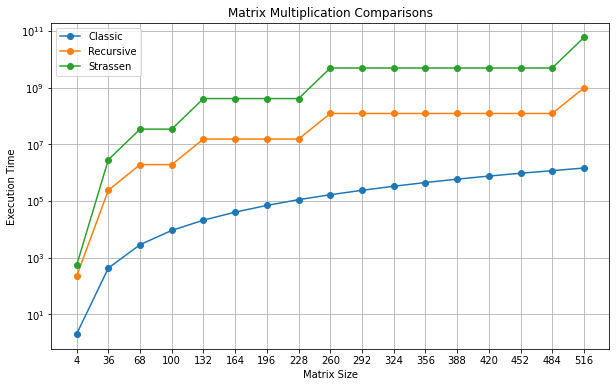

In [9]:
plot_results(data, True)

# Conclusion

In conclusion, the experimental analysis of matrix multiplication algorithms, including classical matrix multiplication, recursive divide and conquer, and Strassen's algorithm, have shown important insight to their uses over various matrix dimensions and types.

Profiling revealed that recursive algorithms incurred significant overhead due to copying partition matrices and recursive function calls. This overhead had a large impact on performance, especially for small input sizes.

Strassen's algorithm showed poorer performance compared to classical and recursive algorithms, particularly for smaller input sizes. However, its advantages became more prominent for larger input sizes. The logarithmic scale highlighted how the growth of classical matrix multiplication's runtime caught up with recursive and Strassen's algorithms as input sizes increased.

The calculated S and P partitions in Strassen's algorithm were shown to be equivalent to the divide and conquer partition calculations. While the growth trends were similar, Strassen's algorithm introduced additional overhead due to the recursively defined and calculated S and P partitions.

The analysis provided a detailed understanding, despite the lack of testing on larger input sizes due to limitations in time, to how these algorithms are of the same family class asymptotically, and where each approach's application is appropriate.